# Plotting
---

questions:
- "How can I plot my data?"
- "How can I save my plot for publishing?"

objectives:
- "Create a time series plot showing a single data set."
- "Create a scatter plot showing relationship between two data sets."

keypoints:
- "[`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python."
- "Plot data directly from a Pandas dataframe."
- "Select and transform data, then plot it."
- "Many styles of plot are available: see the [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) for more options."
- "Can plot many sets of data together."
---

## [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.

*   Commonly use a sub-library called [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
*   The Jupyter Notebook will render plots inline if we ask it to using a "magic" command.


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

*   Simple plots are then (fairly) simple to create.

Text(0, 0.5, 'Position (km)')

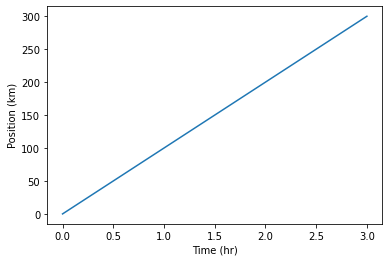

In [4]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

```{admonition} Note: Display All Open Figures
In our Jupyter Notebook example with `%matplotlib inline`, running the cell generates the figure directly below the code. The figure is also included in the Notebook document for future viewing. However, other Python environments require an additional command in order to display the figure.
~~~
plt.show()
~~~
```

## Plot data directly from a [`Pandas dataframe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

*   We can also plot [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
*   This implicitly uses [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html).
*   Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values

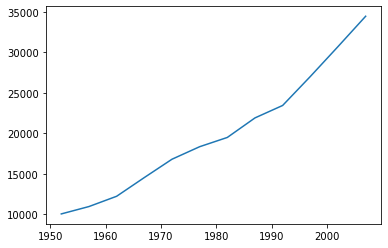

In [7]:
import pandas as pd

data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

# Extract year from last 4 characters of each column name
# The current column names are structured as 'gdpPercap_(year)', 
# so we want to keep the (year) part only for clarity when plotting GDP vs. years
# To do this we use strip(), which removes from the string the characters stated in the argument
# This method works on strings, so we call str before strip()

years = data.columns.str.strip('gdpPercap_')

# Convert year values to integers, saving results back to dataframe

data.columns = years.astype(int)

data.loc['Australia'].plot()

## Select and transform data, then plot it.

*   By default, [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) plots with the rows as the X axis.
*   We can transpose the data in order to plot multiple series.


Text(0, 0.5, 'GDP per capita')

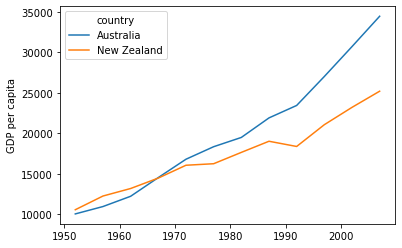

In [8]:
data.T.plot()
plt.ylabel('GDP per capita')

## Many styles of plot are available.

*   For example, do a bar plot using a fancier style.


Text(0, 0.5, 'GDP per capita')

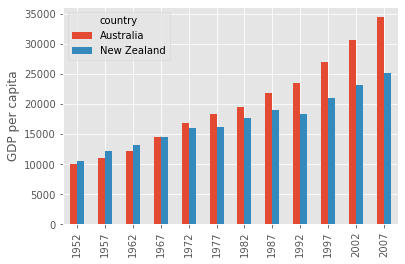

In [9]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

## Data can also be plotted by calling the `matplotlib` `plot` function directly.
*   The command is `plt.plot(x, y)`
*   The color and format of markers can also be specified as an additional optional argument e.g., `b-` is a blue line, `g--` is a green dashed line.

## Get Australia data from dataframe

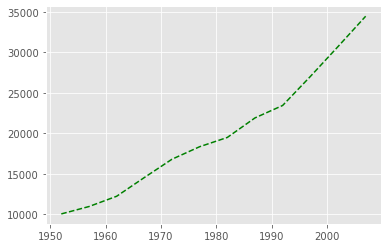

In [10]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')

## Can plot many sets of data together.

Text(0, 0.5, 'GDP per capita ($)')

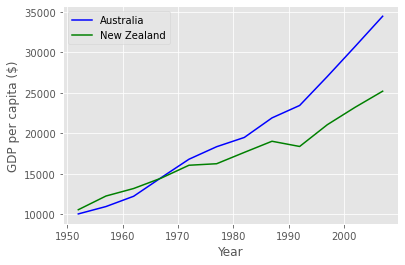

In [11]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

## Adding a Legend

Often when plotting multiple datasets on the same figure it is desirable to have a legend describing the data. This can be done in `matplotlib` in two stages:

* Provide a label for each dataset in the figure:

```python
plt.plot(years, gdp_australia, label='Australia')
plt.plot(years, gdp_nz, label='New Zealand')
```

* Instruct `matplotlib` to create the legend.

```python
plt.legend()
```
By default matplotlib will attempt to place the legend in a suitable position. If you
would rather specify a position this can be done with the `loc=` argument, e.g to place
the legend in the upper left corner of the plot, specify `loc='upper left'`

*   Plot a scatter plot correlating the GDP of Australia and New Zealand
*   Use either `plt.scatter` or `DataFrame.plot.scatter`

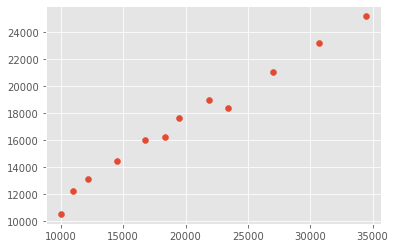

In [15]:
plt.scatter(gdp_australia, gdp_nz)

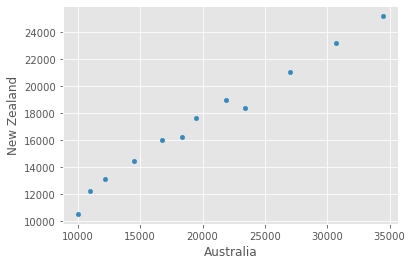

In [14]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

```{admonition} Exercise: Minima and Maxima
Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Europe.
Modify it again to plot the maximum GDP per capita over time for Europe.
~~~
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.____.plot(label='min')
data_europe.____
plt.legend(loc='best')
plt.xticks(rotation=90)
~~~
```
:::{admonition} See Solution
:class: tip, dropdown
```python
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)
```
:::

```{admonition} Exercise: Correlations
Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?
~~~
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')
~~~
```
:::{admonition} See Solution
:class: tip, dropdown
No particular correlations can be seen between the minimum and maximum gdp values year on year. It seems the fortunes of asian countries do not rise and fall together.

You might note that the variability in the maximum is much higher than that of the minimum.  Take a look at the maximum and the max indexes:
~~~
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot()
print(data_asia.idxmax())
print(data_asia.idxmin())
~~~
:::